In [1]:
import warnings 
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import env

In [9]:
from acquire import get_iris_data
iris_df = get_iris_data()
iris_df

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...
145,3,146,6.7,3.0,5.2,2.3,virginica
146,3,147,6.3,2.5,5.0,1.9,virginica
147,3,148,6.5,3.0,5.2,2.0,virginica
148,3,149,6.2,3.4,5.4,2.3,virginica


In [10]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [25]:
iris_df = iris_df.drop(columns = ['species_id', 'measurement_id'])
iris_df = iris_df.rename(columns= {'species_name':'species'})
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Exercise 1
Split your data into train, validate, and test samples.

In [27]:
# 80/20 train/test split
train, test = train_test_split(iris_df, train_size=0.8, random_state=1349, stratify=iris_df.species)
# 70/30 train/validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species)

train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 138 to 54
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


Exercise 2
Create a swarmplot using a melted dataframe of all your numeric variables.

In [28]:
melted = train.melt(id_vars=['species'])
melted

,species,variable,value
0,virginica,sepal_length,6.0
1,setosa,sepal_length,5.0
2,versicolor,sepal_length,5.7
3,versicolor,sepal_length,6.4
4,versicolor,sepal_length,6.2
...,...,...,...
331,virginica,petal_width,2.3
332,versicolor,petal_width,1.3
333,versicolor,petal_width,1.4
334,virginica,petal_width,1.8


<AxesSubplot:xlabel='variable', ylabel='value'>

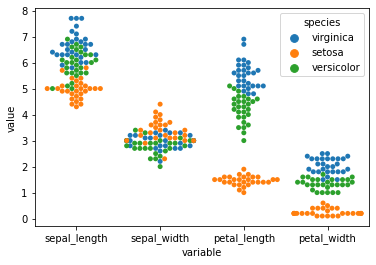

In [30]:
sns.swarmplot(data=melted, x='variable', y='value', hue='species')

Takeaways: Virginica has the biggest petals, Versicolor has the smallest petals, Petal size shows the best separation between species